<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S5_1_3_Digit_Recognition_KMeans_Exercice_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognition 

Vous pouvez tout à fait créer des clusters très utiles sans pour autant avoir des données labellisées. Testons avec MNIST


0. Importez les librairies usuelles 

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

1. Dans Scikit Learn, importez _load_digit_

In [0]:
numbers= load_digits()

2. Regardez la documentation [Load_digit](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) et stockez les nombres dans une variable _numbers_ et votre variable cible dans une variable _target_

In [0]:
data = numbers.data 
target = numbers.target

In [0]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

3. Tentons de visualiser quelques nombres. Regardez d’abord la taille de votre dataset. Combien de colonnes voyez vous ? 

Devinez ensuite quelle taille d’image ce nombre de colonnes devraient donner

In [0]:
# Connaître la taille d'une image 
data.shape

(1797, 64)

4. Regardez maintenant la documentation liée à [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) de matplotlib. Essayez de visualiser un nombre au hasard. Ajoutez en légende, le nombre auquel cette image correspond. Essayez ensuite de visualiser 10 nombres au hasard dans le dataset

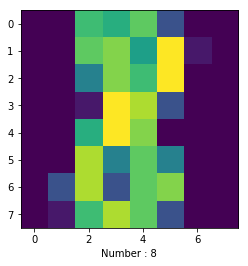

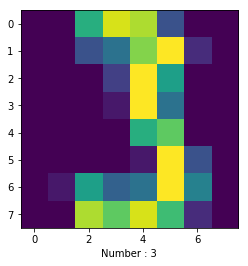

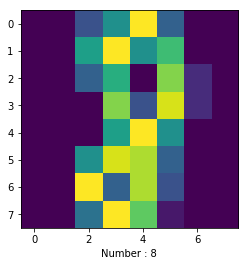

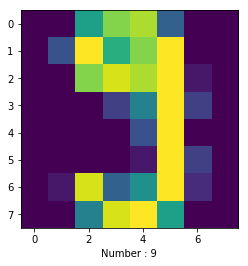

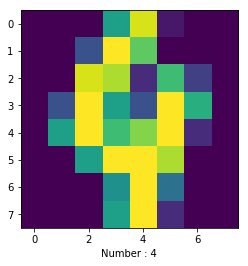

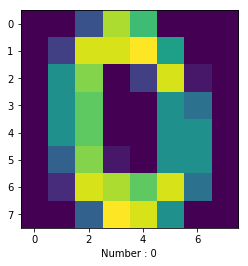

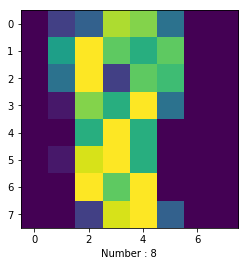

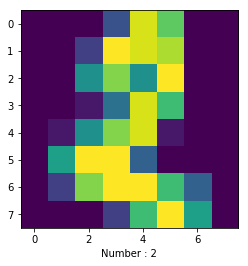

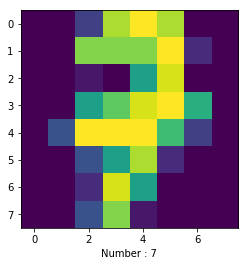

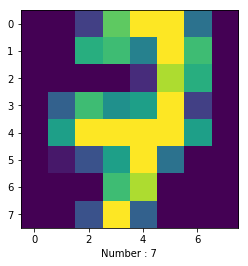

In [0]:
## Visualisation de nombres aléatoire du dataset
for i in np.random.randint(100, size=10):
    plt.imshow(numbers.data[i].reshape(8,8))
    plt.xlabel("Number : {}".format(target[i]))
    plt.show()

5. On va appliquer les KMeans sur notre dataset, à votre avis, à combien de clusters va-t-on initialiser l’algorithme ?

---> 10 puisqu'on a 10 chiffres dans le dataset ! 

6. Créez votre algorithme de KMeans avec le bon nombre de clusters

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=10)

7. Evaluons notre modèle, calculons l’_accuracy_score_ de nos prédictions en important le module de sklearn. Que concluez-vous ?

In [0]:
clusters = kmeans.fit_predict(data)

In [0]:
# Problème d'accuracy
from sklearn.metrics import accuracy_score
accuracy_score(clusters, target)

0.010573177518085699

8. Regardez les coordonnées des centroïds (cf. [cluster_center_](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.cluster.KMeans.html))

9. Essayez de visualiser chacun des centroïds et comparez les avec les différents labels. Que remarquez vous ?

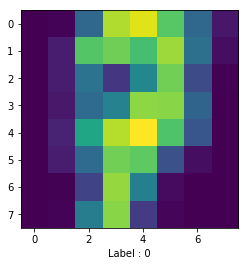

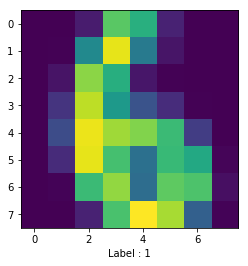

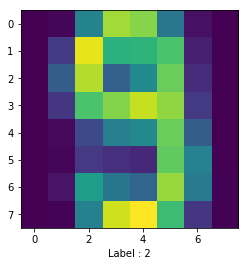

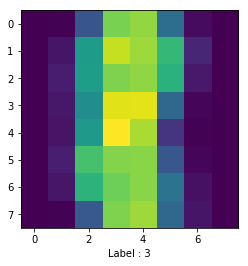

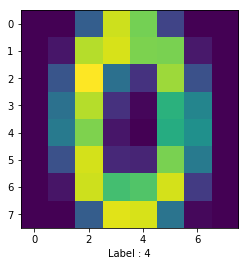

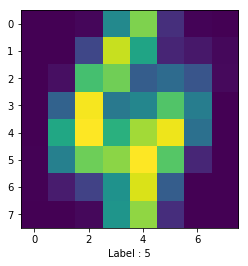

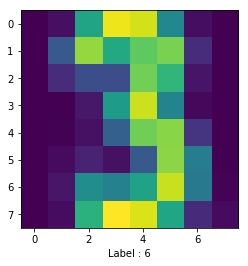

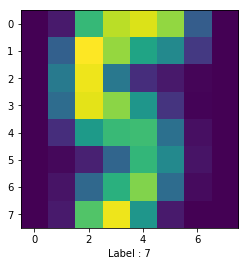

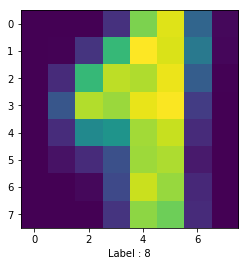

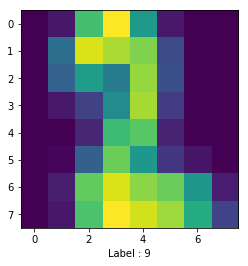

In [0]:
# Visualisation des centroïds
for i in range(10):
    plt.imshow(kmeans.cluster_centers_.reshape(10,8,8)[i])
    plt.xlabel("Label : {}".format(i))
    plt.show()

----> Il y a l'air d'avoir des bonnes prédictions ! Il semblerait simplement que les centroïds ne correspondent pas forcément au label. 

10. Trouver un moyen de remettre les choses dans l’ordre. Voici quelques indices :

    a. Regardez dans quel cluster appartient le plus de chiffres similaires de la variable _target_
   

In [0]:
# Regardons dans quel clusters appartients chacun des chiffres 
target[clusters==1]

# Dans cet exemple, on peut voir qu'il y a l'air d'avoir que des deux qui appartiennent au cluster 1

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 8, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6])

In [0]:
# Généralisons : Il faut en fait trouver le mode de chacun des arrays correspond au cluster qu'on souhaite
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(target[mask])[0]

11. Réévaluez votre modèle. Quel est votre nouvel *accuracy_score* ?

In [0]:
# Nouvelle d'accuracy
from sklearn.metrics import accuracy_score
accuracy_score(labels, target)

0.7935447968836951

12. Regardez les chiffres où notre algorithme s’est le plus trompé via une matrice de confusion

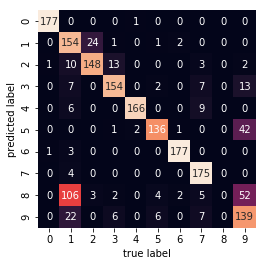

In [0]:
# Visualisation de notre CM
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(target, labels)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=numbers.target_names,
            yticklabels=numbers.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');